In [312]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-dataset/Statistics.csv


In [313]:
# Read data
df = pd.read_csv('../input/youtube-dataset/Statistics.csv',encoding='unicode_escape')

In [314]:
# Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [315]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [316]:
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000.0,0.000000e+00,NaN,Music,0,NaN,NaN,NaN,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,United States,US,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000.0,2.905804e+10,Gaming,PewDiePie,4716,Japan,Japan,JP,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000.0,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,Russia,RU,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000.0,7.718017e+10,Entertainment,Vlad and Niki,574,United States,United States,US,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [317]:
# Pre-Processing

# Remove duplicates based on the Youtuber name
df = df.drop_duplicates(subset='Youtuber')

In [318]:
#Dropping channels created before 2005
df = df[df['created_year'] >= 2005]

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     989 non-null    int64  
 1   Youtuber                                 989 non-null    object 
 2   subscribers                              986 non-null    float64
 3   video views                              989 non-null    float64
 4   category                                 937 non-null    object 
 5   Title                                    989 non-null    object 
 6   uploads                                  989 non-null    int64  
 7   Country of origin                        869 non-null    object 
 8   Country                                  869 non-null    object 
 9   Abbreviation                             869 non-null    object 
 10  channel_type                             962 non-null  

In [320]:
# Renaming columns with long names
df.rename(columns = {'video_views_for_the_last_30_days':'last_month_views'},inplace = True)
df.rename(columns = {'subscribers_for_last_30_days':'last_month_subs'},inplace = True)
df.rename(columns = {'Gross tertiary education enrollment (%)':'gte_enrol_percent'},inplace = True)
df.rename(columns = {'Unemployment rate':'Unemployment_rate'},inplace = True)

In [321]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'last_month_views', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'last_month_subs', 'created_year',
       'created_month', 'created_date', 'gte_enrol_percent', 'Population',
       'Unemployment_rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [322]:
# Finding missing values in each column
print(df.isnull().sum())

rank                          0
Youtuber                      0
subscribers                   3
video views                   0
category                     52
Title                         0
uploads                       0
Country of origin           120
Country                     120
Abbreviation                120
channel_type                 27
video_views_rank              0
country_rank                114
channel_type_rank            29
last_month_views             51
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             332
created_year                  0
created_month                 7
created_date                  0
gte_enrol_percent           121
Population                  121
Unemployment_rate           121
Urban_population            121
Latitude                    121
Longitude                   121
dtype: int64


In [323]:
# Comparing Country of origin and Country
print(df['Country of origin'].value_counts())
print(df['Country'].value_counts())

Country of origin
United States           311
India                   168
Brazil                   61
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Australia                 8
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
An

In [324]:
# Dropping Country of origin cause it is same as Country
df.drop(columns=['Country of origin'],inplace = True)

In [325]:
# Deleting rows with 0 views
df= df[df['video views'] != 0]

In [326]:
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte_enrol_percent,Population,Unemployment_rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000.0,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000.0,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000.0,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000.0,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000.0,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [327]:
# Dropping rows where missing info is less in number
null_rows = df.loc[df['subscribers'].isnull() | df['video_views_rank'].isnull()]

In [328]:
df.dropna(subset=['subscribers'],inplace = True)
df.dropna(subset=['video_views_rank'],inplace = True)

In [329]:
print(df.isnull().sum())

rank                          0
Youtuber                      0
subscribers                   0
video views                   0
category                     45
Title                         0
uploads                       0
Country                     114
Abbreviation                114
channel_type                 25
video_views_rank              0
country_rank                108
channel_type_rank            26
last_month_views             46
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             324
created_year                  0
created_month                 6
created_date                  0
gte_enrol_percent           115
Population                  115
Unemployment_rate           115
Urban_population            115
Latitude                    115
Longitude                   115
dtype: int64


In [330]:
# Replacing null category and channel_type with "Others" string
df["category"] = df["category"].fillna("Others") 
df["channel_type"] = df["channel_type"].fillna("Others") 

In [331]:
print(df.isnull().sum())

rank                          0
Youtuber                      0
subscribers                   0
video views                   0
category                      0
Title                         0
uploads                       0
Country                     114
Abbreviation                114
channel_type                  0
video_views_rank              0
country_rank                108
channel_type_rank            26
last_month_views             46
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             324
created_year                  0
created_month                 6
created_date                  0
gte_enrol_percent           115
Population                  115
Unemployment_rate           115
Urban_population            115
Latitude                    115
Longitude                   115
dtype: int64


1.	What are the top 10 YouTube channels based on the number of subscribers?
2.	Which category has the highest average number of subscribers?
3.	How many videos, on average, are uploaded by YouTube channels in each category?
4.	What are the top 5 countries with the highest number of YouTube channels?
5.	What is the distribution of channel types across different categories?
6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?
7.	How do the monthly earnings vary throughout different categories?
8.	What is the overall trend in subscribers gained in the last 30 days across all channels?
9.	Are there any outliers in terms of yearly earnings from YouTube channels?
10.	What is the distribution of channel creation dates? Is there any trend over time?
11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?
12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?
13.	What is the average urban population percentage in countries with YouTube channels?
14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?
15.	What is the correlation between the number of subscribers and the population of a country?
16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?
17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?
18.	How does the distribution of video views for the last 30 days vary across different channel types?
19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?
20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?


In [332]:
#1. Top 10 YouTube channels based on the number of subscribers
df = df.sort_values(by='subscribers',ascending = False)
print('Top 10 YouTube channels based on the number of subscribers:')
df.head(10)

Top 10 YouTube channels based on the number of subscribers:


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte_enrol_percent,Population,Unemployment_rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000.0,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000.0,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000.0,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000.0,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000.0,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [333]:
unique_categories =df['category'].unique()

# Print the unique categories
print("Unique categories:")
print(unique_categories)

Unique categories:
['Music' 'Entertainment' 'Education' 'Shows' 'People & Blogs' 'Gaming'
 'Sports' 'Others' 'Howto & Style' 'Film & Animation' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


In [334]:
#2. Highest average number of subscribers by category

# Calculating the average subscribers grouped by category
avg_subs_per_category = df.groupby('category')['subscribers'].mean()

avg_subs_per_category = avg_subs_per_category.sort_values(ascending=False).head(20)
print('Highest average number of subscribers by category:')
print(avg_subs_per_category)


Highest average number of subscribers by category:
category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Nonprofits & Activism    2.775000e+07
Sports                   2.710909e+07
Education                2.654222e+07
Music                    2.577650e+07
Movies                   2.565000e+07
Film & Animation         2.431628e+07
Entertainment            2.155212e+07
Others                   2.102667e+07
Gaming                   2.097935e+07
People & Blogs           2.057846e+07
Comedy                   2.012319e+07
News & Politics          2.000400e+07
Howto & Style            1.951282e+07
Science & Technology     1.861765e+07
Pets & Animals           1.810000e+07
Autos & Vehicles         1.785000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


In [335]:
#3. Video uploaded by YouTube channels on an average in each category
avg_uploads_per_category = df.groupby('category')['uploads'].mean()

#Sorting by avg uploads count in descending order
avg_uploads_per_category = avg_uploads_per_category.sort_values(ascending=False).head(20) 
print('Video uploaded by YouTube channels on an average in each category:')
print(avg_uploads_per_category)

Video uploaded by YouTube channels on an average in each category:
category
News & Politics          116954.000000
Nonprofits & Activism    102912.000000
Shows                     27443.692308
Sports                    14493.727273
Entertainment             12151.139831
People & Blogs             9328.000000
Trailers                   6839.000000
Pets & Animals             4451.500000
Gaming                     4272.195652
Movies                     3553.000000
Education                  3142.866667
Film & Animation           2966.744186
Music                      2358.865000
Science & Technology       2114.058824
Autos & Vehicles           1898.500000
Howto & Style              1700.794872
Comedy                     1119.753623
Others                      962.511111
Travel & Events             766.000000
Name: uploads, dtype: float64


In [336]:
# Dropping rows with null values in Country column
filtered_country = df.dropna(subset=['Country'])

In [337]:
#4. Top 5 countries with the highest number of YouTube channels
top_country_by_channels = filtered_country.groupby('Country')['Youtuber'].count()
top_country_by_channels = top_country_by_channels.sort_values(ascending=False).head(5)
print('Top 5 countries with the highest number of YouTube channels:')
print(top_country_by_channels)

Top 5 countries with the highest number of YouTube channels:
Country
United States     309
India             166
Brazil             61
United Kingdom     43
Mexico             33
Name: Youtuber, dtype: int64


In [338]:
#5. Distribution of channel types across different categories
#Contingency Table
distribution = pd.crosstab(df['category'], df['channel_type'])

print("Distribution of channel types across different categories:")
print(distribution)

Distribution of channel types across different categories:
channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      1       0          0              1     0   
Comedy                       0      0      38          0             20     1   
Education                    0      0       0         35              3     2   
Entertainment                0      1       5          2            167     6   
Film & Animation             0      0       1          2             15    17   
Gaming                       0      1       1          0             18     2   
Howto & Style                0      0       0          0              7     0   
Movies                       0      0       0          0              0     2   
Music                        0      0       0          1             12     5   
News & Politics              0      0       0     

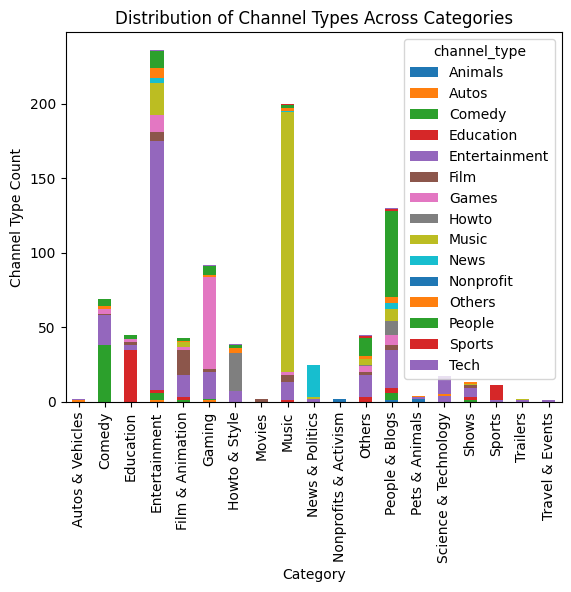

In [339]:
# Create a bar chart
distribution.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Channel Type Count')
plt.title('Distribution of Channel Types Across Categories')
plt.show()

In [340]:
#6. Correlation between the number of subscribers and total video views for YouTube channels

correlation = df['subscribers'].corr(df['video views'])

print("Correlation between subscribers and video views:", correlation)

Correlation between subscribers and video views: 0.8250820644440764


In [341]:
#7. Monthly earnings variation throughout different categories
# Descriptive statistics for monthly earnings grouped by category
monthly_earnings_by_category = df.groupby('category')['highest_monthly_earnings'].describe()

print("Descriptive statistics of monthly earnings by category:")
print(monthly_earnings_by_category)

Descriptive statistics of monthly earnings by category:
                       count          mean           std       min        25%  \
category                                                                        
Autos & Vehicles         2.0  1.086350e+06  4.435681e+05  772700.0  929525.00   
Comedy                  69.0  6.683122e+05  1.094732e+06       0.0   44000.00   
Education               45.0  6.951778e+05  1.283739e+06       0.0   95600.00   
Entertainment          236.0  6.345257e+05  1.181410e+06       0.0   21125.00   
Film & Animation        43.0  7.749670e+05  1.632054e+06       0.0   67750.00   
Gaming                  92.0  2.742229e+05  5.139344e+05       0.0   31100.00   
Howto & Style           39.0  1.925452e+05  3.466197e+05       0.0   29600.00   
Movies                   2.0  4.547000e+05  6.430429e+05       0.0  227350.00   
Music                  200.0  5.578226e+05  9.061619e+05       0.0  149525.00   
News & Politics         25.0  6.649612e+05  5.606633e

In [342]:

filtered_year = df.dropna(subset=['created_year'])


# Calculating average subscribers per month
monthly_average = filtered_year['subscribers'] / ((2024 - filtered_year['created_year']) * 12)

# Filling null values with average subscribers per month
filtered_year.loc[filtered_year['last_month_subs'] .isna(), 'last_month_subs'] = monthly_average
    
filtered_year.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte_enrol_percent,Population,Unemployment_rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,1.037037e+06,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


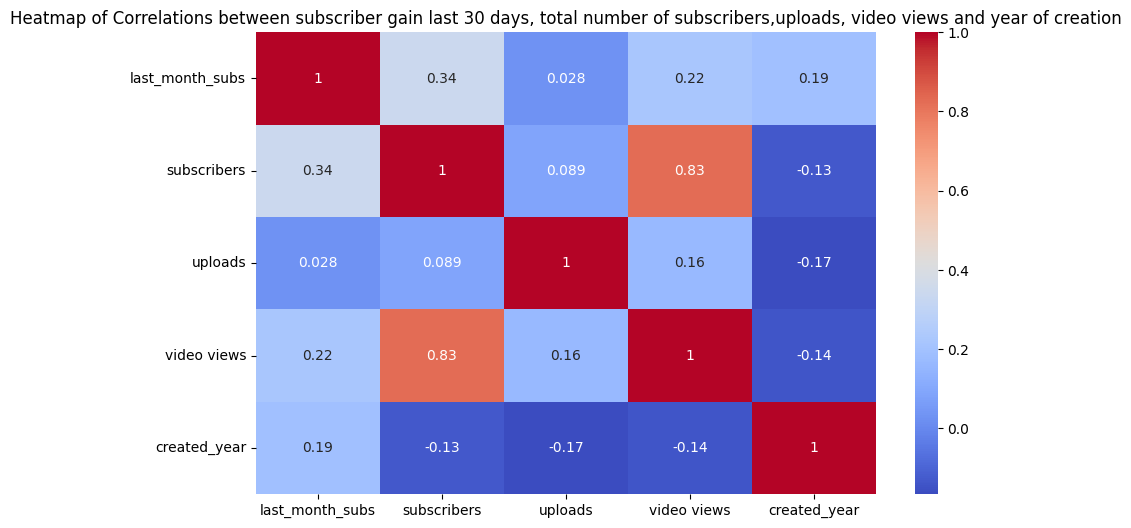

In [343]:

# correlation matrix between last month subscriber gain, total number of subscribers and year of creation
corr_matrix = filtered_year[['last_month_subs', 'subscribers','uploads', 'video views','created_year']].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between subscriber gain last 30 days, total number of subscribers,uploads, video views and year of creation')
plt.show()

In [344]:
#8. Overall trend in subscribers gained in the last 30 days across all channels
last_month_subs_by_category = filtered_year.groupby('category')['last_month_subs'].describe()

last_month_subs_by_category = last_month_subs_by_category.sort_values(by='75%',ascending = False)
print("Descriptive statistics of last month subscriber gain by category:")
print(last_month_subs_by_category)

Descriptive statistics of last month subscriber gain by category:
                       count           mean           std            min  \
category                                                                   
Shows                   13.0  500000.153846  4.242639e+05       2.000000   
Autos & Vehicles         2.0  400000.000000  1.414214e+05  300000.000000   
Movies                   2.0  400000.000000  1.414214e+05  300000.000000   
Others                  45.0  514934.210700  8.244091e+05       8.000000   
Sports                  11.0  252834.008097  2.476362e+05   90384.615385   
People & Blogs         130.0  328523.033728  3.936386e+05       1.000000   
Comedy                  69.0  335378.824891  3.939504e+05       5.000000   
Film & Animation        43.0  461932.855628  1.103551e+06       1.000000   
Trailers                 2.0  300000.000000  1.414214e+05  200000.000000   
Pets & Animals           4.0  325001.250000  5.188117e+05       5.000000   
Nonprofits & Activism 

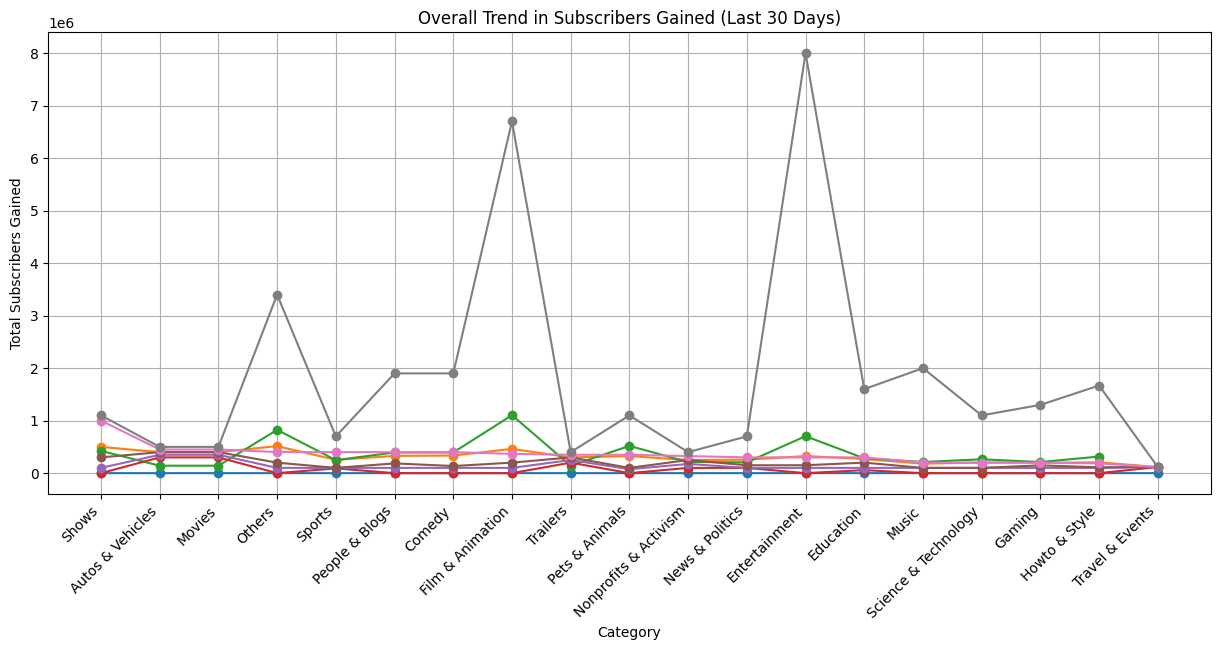

In [345]:
plt.figure(figsize=(15, 6))
plt.plot(last_month_subs_by_category.index, last_month_subs_by_category.values, marker='o', linestyle='-')
plt.xlabel('Category')
plt.ylabel('Total Subscribers Gained')
plt.title('Overall Trend in Subscribers Gained (Last 30 Days)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

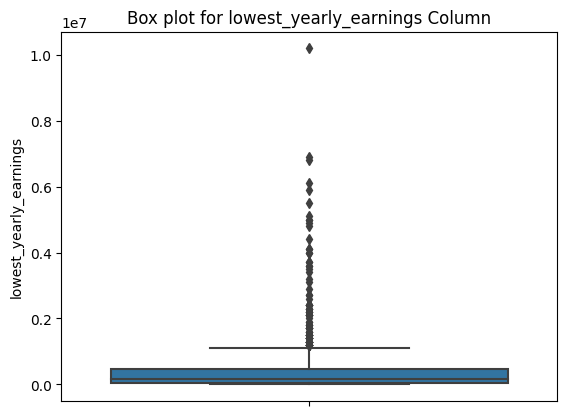

In [346]:
#9. Outliers in terms of yearly earnings from YouTube channels
# Boxplot to visualize outliers in yearly earnings - lowest
sns.boxplot(y='lowest_yearly_earnings',data = df)
plt.title('Box plot for lowest_yearly_earnings Column')
plt.show()

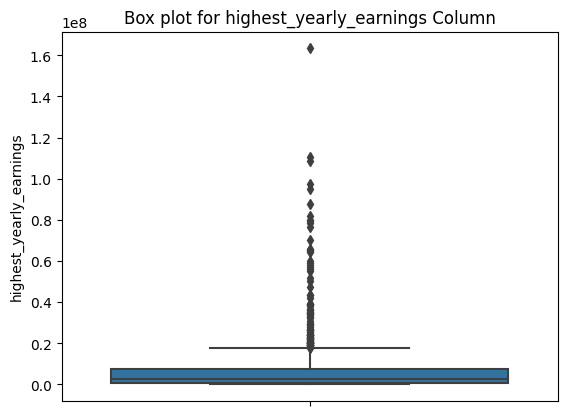

In [347]:
# Boxplot to visualize outliers in yearaly earnings - highest
sns.boxplot(y='highest_yearly_earnings',data = df)
plt.title('Box plot for highest_yearly_earnings Column')
plt.show()

In [348]:
avg_yearly_earnings = (df['lowest_yearly_earnings']+df['highest_yearly_earnings'])/2
avg_yearly_earnings.head()

0    57600000.0
2    34350000.0
3    50350000.0
4    46500000.0
6    18650000.0
dtype: float64

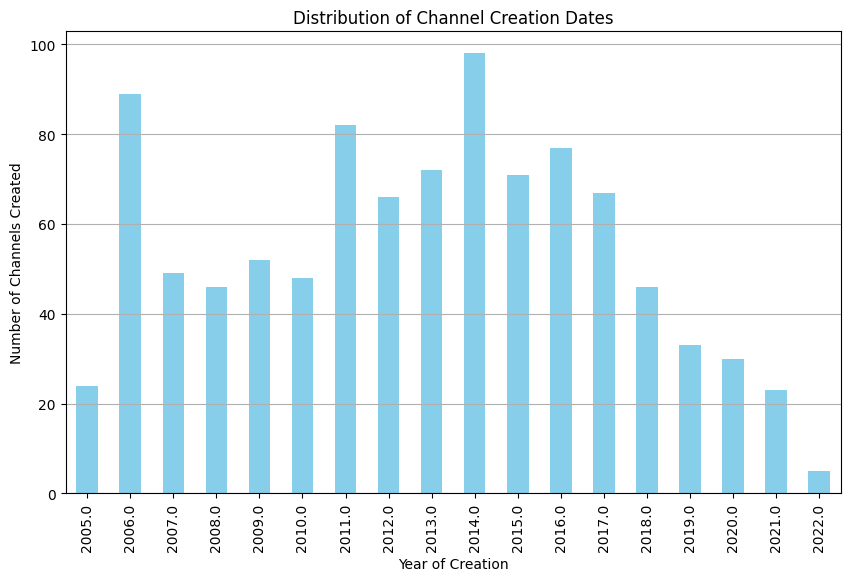

In [349]:
#10. Distribution of channel creation dates
channel_counts_per_year = filtered_year['created_year'].value_counts()

channel_counts_per_year = channel_counts_per_year.sort_index(ascending=True)

plt.figure(figsize=(10, 6))
channel_counts_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year of Creation')
plt.ylabel('Number of Channels Created')
plt.title('Distribution of Channel Creation Dates')
plt.grid(axis='y')
plt.show()

In [350]:
print(df.isnull().sum())

rank                          0
Youtuber                      0
subscribers                   0
video views                   0
category                      0
Title                         0
uploads                       0
Country                     114
Abbreviation                114
channel_type                  0
video_views_rank              0
country_rank                108
channel_type_rank            26
last_month_views             46
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             324
created_year                  0
created_month                 6
created_date                  0
gte_enrol_percent           115
Population                  115
Unemployment_rate           115
Urban_population            115
Latitude                    115
Longitude                   115
dtype: int64


In [351]:
# Creating new dataframe with null values excluded in population
filtered_data = df.dropna(subset=['Population'])
print(filtered_data.isnull().sum())

rank                          0
Youtuber                      0
subscribers                   0
video views                   0
category                      0
Title                         0
uploads                       0
Country                       0
Abbreviation                  0
channel_type                  0
video_views_rank              0
country_rank                  0
channel_type_rank             7
last_month_views             19
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             269
created_year                  0
created_month                 6
created_date                  0
gte_enrol_percent             0
Population                    0
Unemployment_rate             0
Urban_population              0
Latitude                      0
Longitude                     0
dtype: int64


In [352]:
# Filling null values in Monthly Subscriber with the corresponding monthly average

monthly_average_subs = filtered_data['subscribers'] / ((2024 - filtered_data['created_year']) * 12)
filtered_data.loc[filtered_data['last_month_subs'] .isna(), 'last_month_subs'] = monthly_average

monthly_average_views = filtered_data['video views'] / ((2024 - filtered_data['created_year']) * 12)
filtered_data.loc[filtered_data['last_month_views'] .isna(), 'last_month_views'] = monthly_average_views

filtered_data.head(15)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte_enrol_percent,Population,Unemployment_rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,1.037037e+06,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000.0,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,6.607143e+05,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000.0,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,1.000000e+05,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000.0,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,6.000000e+05,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000.0,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1.100000e+06,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000.0,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,6.000000e+05,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [353]:
# Dataframe after handling most of the null values for further analysis
print(filtered_data.isnull().sum())

rank                        0
Youtuber                    0
subscribers                 0
video views                 0
category                    0
Title                       0
uploads                     0
Country                     0
Abbreviation                0
channel_type                0
video_views_rank            0
country_rank                0
channel_type_rank           7
last_month_views            0
lowest_monthly_earnings     0
highest_monthly_earnings    0
lowest_yearly_earnings      0
highest_yearly_earnings     0
last_month_subs             0
created_year                0
created_month               6
created_date                0
gte_enrol_percent           0
Population                  0
Unemployment_rate           0
Urban_population            0
Latitude                    0
Longitude                   0
dtype: int64


In [354]:
# New DataFrame with 'gte_enrol_percent', 'Population','Unemployment_rate','Urban_population','Latitude','Longitude' by country
fd = filtered_data.groupby('Country')[['subscribers','last_month_subs','gte_enrol_percent', 'Population','Unemployment_rate','Urban_population','Latitude','Longitude']].mean().reset_index()

In [355]:
# Adding channel count to newly created dataframe
channel_counts = filtered_data['Country'].value_counts().reset_index(name='channel_count')
print(channel_counts)
fd = fd.merge(channel_counts, on='Country', how='right')
fd.head()

                 Country  channel_count
0          United States            309
1                  India            166
2                 Brazil             61
3         United Kingdom             43
4                 Mexico             33
5              Indonesia             28
6                  Spain             21
7               Thailand             18
8            South Korea             17
9                 Russia             16
10                Canada             14
11             Argentina             13
12           Philippines             12
13              Colombia             11
14          Saudi Arabia              9
15               Ukraine              8
16             Australia              8
17  United Arab Emirates              7
18               Germany              6
19              Pakistan              6
20                France              5
21                 Japan              5
22                Sweden              4
23                Turkey              4


,Country,subscribers,last_month_subs,gte_enrol_percent,Population,Unemployment_rate,Urban_population,Latitude,Longitude,channel_count
0,United States,2.276311e+07,270155.543484,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,309
1,India,2.441687e+07,354882.799261,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,166
2,Brazil,1.979180e+07,183630.617447,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,61
3,United Kingdom,2.133488e+07,193868.615547,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,43
4,Mexico,1.899697e+07,165698.098198,40.2,1.260140e+08,3.42,102626859.0,23.634501,-102.552784,33


In [356]:
print(fd.isnull().sum())

Country              0
subscribers          0
last_month_subs      0
gte_enrol_percent    0
Population           0
Unemployment_rate    0
Urban_population     0
Latitude             0
Longitude            0
channel_count        0
dtype: int64


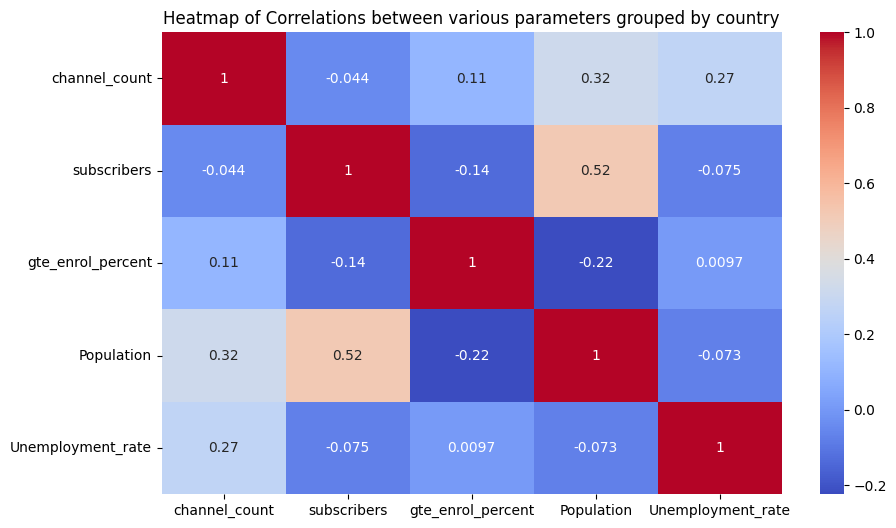

In [357]:
# correlation matrix between last month subscriber gain, total number of subscribers and year of creation
corr_mat = fd[['channel_count', 'subscribers','gte_enrol_percent', 'Population','Unemployment_rate']].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between various parameters grouped by country')
plt.show()

In [358]:
#11. Relationship between gross tertiary education enrollment and the number of YouTube channels in a country
cor = fd['channel_count'].corr(df['gte_enrol_percent'])

print("Correlation between channel count and gross tertiary education enrollment percent:", cor)

Correlation between channel count and gross tertiary education enrollment percent: -0.1374506959758435


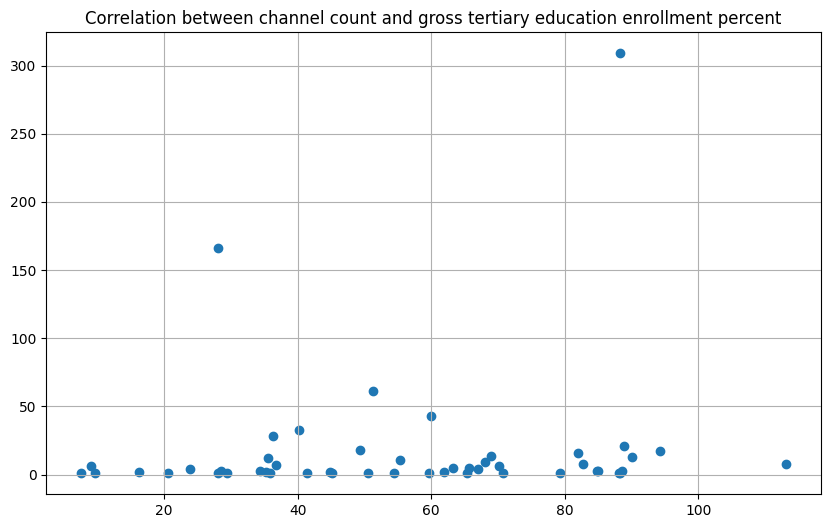

In [359]:
plt.figure(figsize=(10, 6))
plt.scatter(fd['gte_enrol_percent'], fd['channel_count'])
#plt.xlabel(education_col)
#plt.ylabel(channel_col)
plt.title('Correlation between channel count and gross tertiary education enrollment percent')
plt.grid(True)
plt.show()

In [360]:
#12. Unemployment rate variation among the top 10 countries with the highest number of YouTube channels
fd_top10 = fd.head(10)
corr_channel_unemp = fd_top10['channel_count'].corr(fd_top10['Unemployment_rate'])

print("Correlation between channel count and unemployment rate of top 10 countries:", corr_channel_unemp)

Correlation between channel count and unemployment rate of top 10 countries: 0.5295201355557377


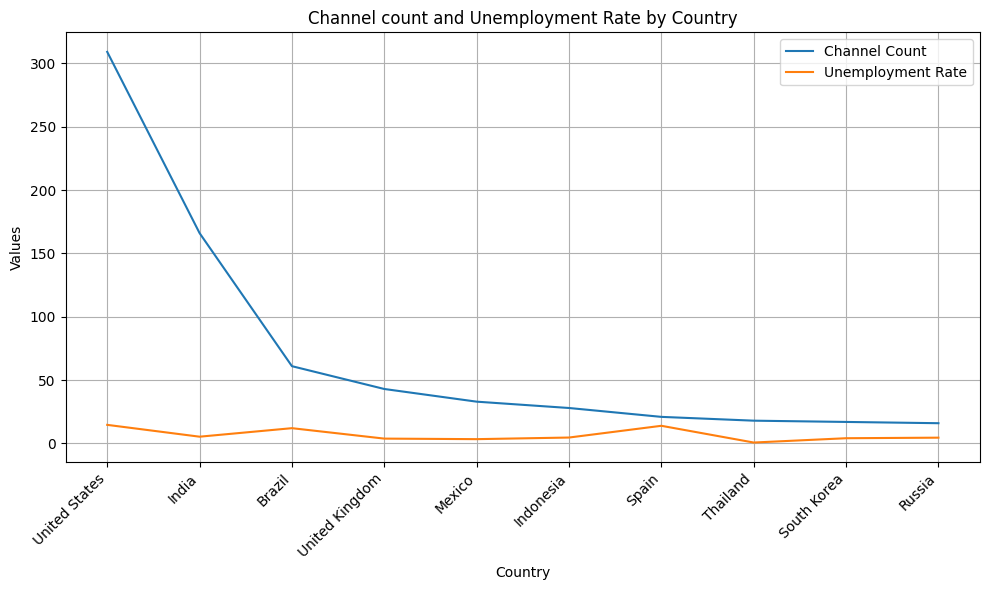

In [361]:
plt.figure(figsize=(10, 6))
plt.plot(fd_top10['Country'], fd_top10['channel_count'],label = 'Channel Count')
plt.plot(fd_top10['Country'], fd_top10['Unemployment_rate'], label = 'Unemployment Rate')
#plt.plot(df[category_col], df[col], label=col)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Channel count and Unemployment Rate by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [362]:
#13. Average urban population percentage in countries with YouTube channels
fd['Urban_population_percent'] = (fd['Urban_population'] / fd['Population']) * 100
print('Average urban population percentage in countries with YouTube channels: ',fd['Urban_population_percent'].mean())

Average urban population percentage in countries with YouTube channels:  70.0483033344962


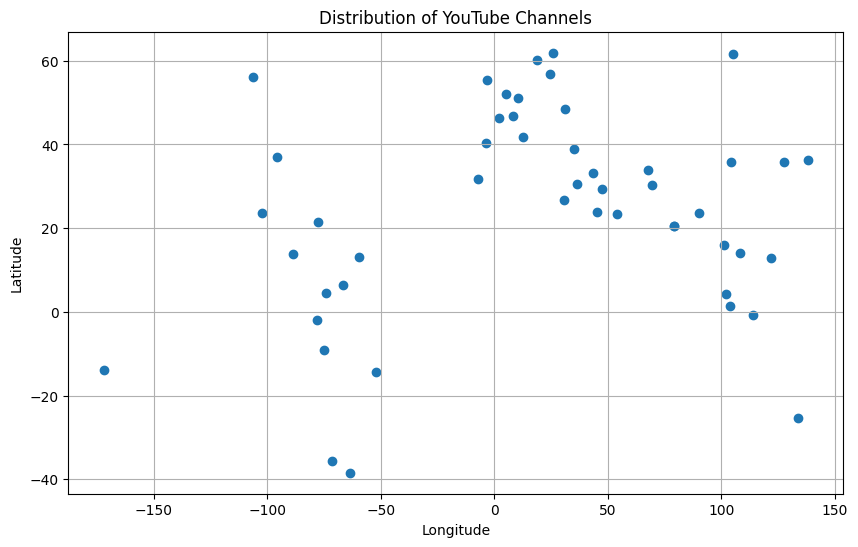

In [363]:
#14. Distribution of YouTube channels based on latitude and longitude coordinates
plt.figure(figsize=(10, 6))
plt.scatter(fd['Longitude'], fd['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of YouTube Channels')
plt.grid(True)
plt.show()

In [364]:
#15. Correlation between the number of subscribers and the population of a country
corr_subs_ppl = fd['subscribers'].corr(fd['Population'])

print("Correlation between Population and Subscribers:", corr_subs_ppl)

Correlation between Population and Subscribers: 0.5209898007551594


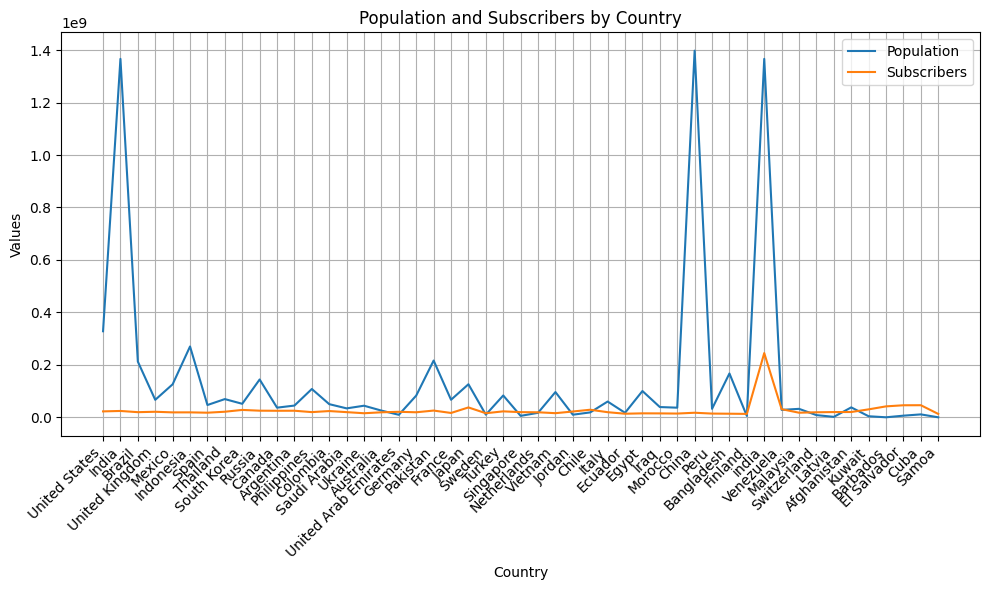

In [365]:
plt.figure(figsize=(10, 6))
plt.plot(fd['Country'], fd['Population'],label = 'Population')
plt.plot(fd['Country'], fd['subscribers'], label = 'Subscribers')
#plt.plot(df[category_col], df[col], label=col)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Population and Subscribers by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [366]:
#16. Top 10 countries with the highest number of YouTube channels compare in terms of their total population
print(fd_top10.head(10))
corr_channel_ppl = fd_top10['channel_count'].corr(fd_top10['Population'])

print("Correlation between channel count and population:", corr_channel_ppl)

          Country   subscribers  last_month_subs  gte_enrol_percent  \
0   United States  2.276311e+07    270155.543484               88.2   
1           India  2.441687e+07    354882.799261               28.1   
2          Brazil  1.979180e+07    183630.617447               51.3   
3  United Kingdom  2.133488e+07    193868.615547               60.0   
4          Mexico  1.899697e+07    165698.098198               40.2   
5       Indonesia  1.907500e+07    494544.040816               36.3   
6           Spain  1.774762e+07    145158.569564               88.9   
7        Thailand  2.147222e+07    139070.908515               49.3   
8     South Korea  2.833529e+07    473253.444031               94.3   
9          Russia  2.545000e+07    333444.635417               81.9   

     Population  Unemployment_rate  Urban_population   Latitude   Longitude  \
0  3.282395e+08              14.70       270663028.0  37.090240  -95.712891   
1  1.366418e+09               5.36       471031528.0  20.593

In [367]:
#17. Correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country
corr_subs30days_ppl = fd['last_month_subs'].corr(fd['Population'])

print("Correlation between subscribers in last 30 days and population:", corr_subs30days_ppl)

Correlation between subscribers in last 30 days and population: 0.3202126961563149


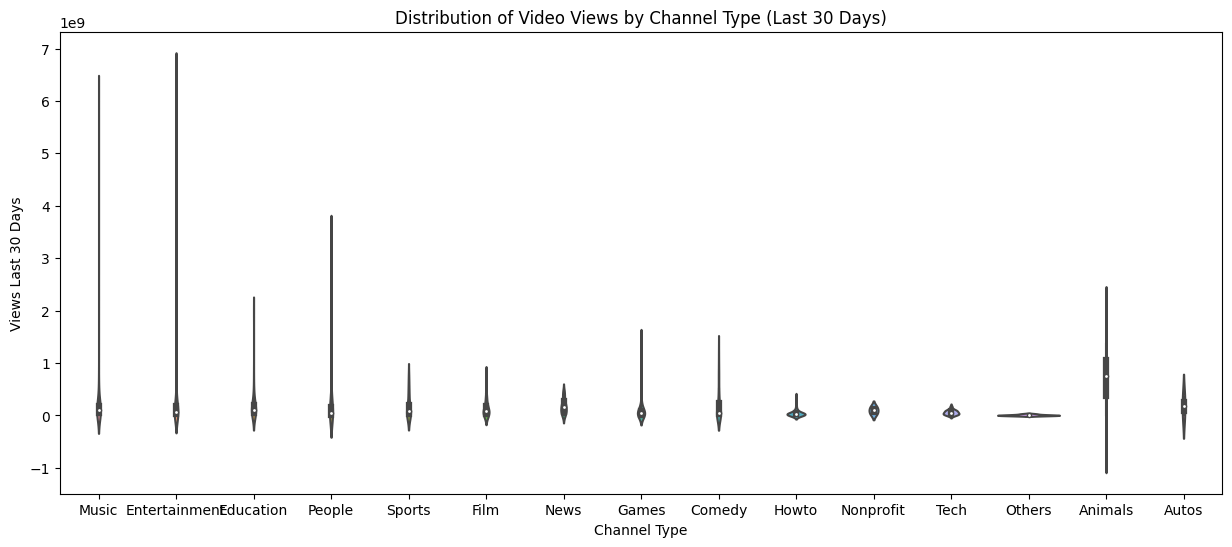

In [368]:
#18. Distribution of video views for the last 30 days vary across different channel types
#Violin Plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='channel_type', y='last_month_views', data=filtered_data)
plt.xlabel('Channel Type')
plt.ylabel('Views Last 30 Days')
plt.title('Distribution of Video Views by Channel Type (Last 30 Days)')
plt.show()

In [369]:
#19. Seasonal trends in the number of videos uploaded by YouTube channels
seasonal_trend = filtered_data.groupby('created_month')[['uploads']].sum().sort_values(by = 'uploads')
print(seasonal_trend)

               uploads
created_month         
Apr             166425
Dec             244070
Mar             363808
Jul             493007
May             656243
Feb             775931
Nov             799860
Jan             799997
Jun             978380
Sep            1179897
Oct            1287004
Aug            1307743


In [370]:
#20. Average number of subscribers gained per month since the creation of YouTube channels till now
monthly_subs = filtered_data['subscribers'] / ((2024 - filtered_data['created_year']) * 12)
print(monthly_subs.mean())

189875.70821996685
